# First script

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(512, 512)
0 255
uint8


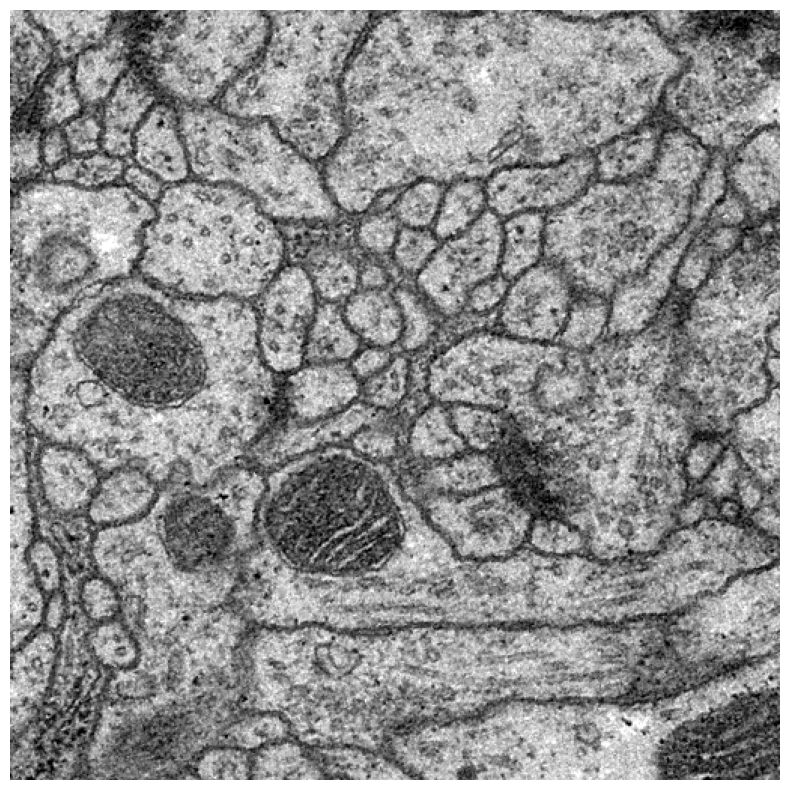

In [11]:
folder = 'data/train_images/'

# read train_images
def read_train_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        images.append(img)
    return images

images = read_train_images(folder)

# show the first image
print(images[0].shape)
print(images[0].min(),images[0].max())
print(images[0].dtype)
plt.figure(figsize=(10, 10))
plt.imshow(images[0], cmap = 'gray')
plt.axis('off')
plt.show()

This is the reason why we import the images as one channel images: 

In [12]:
# Check if all three channels are identical
# is_grayscale = (images[0][:, :, 0] == images[0][:, :, 1]).all() and (images[0][:, :, 1] == images[0][:, :, 2]).all()
# print("Is the image grayscale?", is_grayscale)

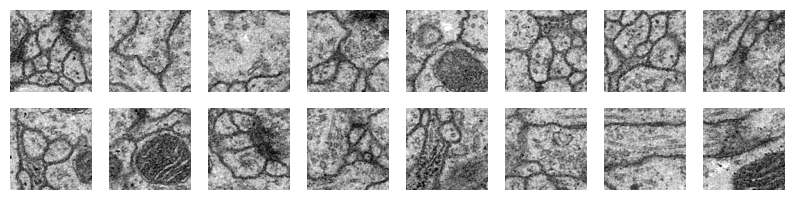

In [15]:
# do patches of the images, of 128x128
def create_patches(image, patch_size=128):
    patches = []
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            patch = image[i:i+patch_size, j:j+patch_size]
            if patch.shape[0] == patch_size and patch.shape[1] == patch_size:
                patches.append(patch)
    return patches

# create patches of the first image
patches = create_patches(images[0], patch_size=128)

# show patches
plt.figure(figsize=(10, 10))
for i, patch in enumerate(patches):
    plt.subplot(8, 8, i+1)
    plt.imshow(patch, cmap='gray')
    plt.axis('off')
plt.show()